In [2]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0]) -3.94950811
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

inner = []
outer = []

for i in range(12, 19):
    for o in range(16, 23):
        inner.append(i)
        outer.append(o)

innerr = []
outerr = []
            
for i in range(0, len(inner)):
    if inner[i] <= outer[i]:
        innerr.append(inner[i])
        outerr.append(outer[i])
        
print(innerr)
print(outerr)
        
energy = energyList('*.out')

activation = []

for i in range(12, 19):
    for o in range(16, 23):
        try:
            activation.append(energy[f'{i}{o}.out'])
        except:
            pass

[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18]
[16, 17, 18, 19, 20, 21, 22, 16, 17, 18, 19, 20, 21, 22, 16, 17, 18, 19, 20, 21, 22, 16, 17, 18, 19, 20, 21, 22, 16, 17, 18, 19, 20, 21, 22, 17, 18, 19, 20, 21, 22, 18, 19, 20, 21, 22]


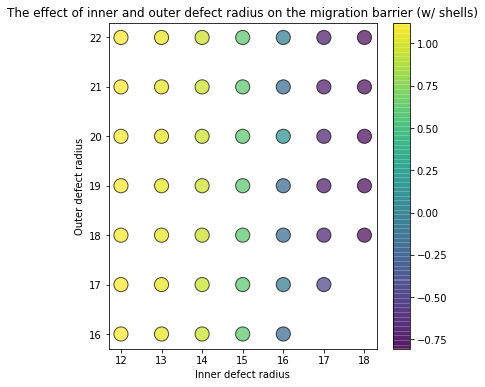

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

sctt = ax.scatter(innerr, outerr,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=activation)
plt.colorbar(sctt, ax=ax)
plt.xlabel('Inner defect radius')
plt.ylabel('Outer defect radius')
plt.title('The effect of inner and outer defect radius on the migration barrier (w/ shells)')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/3d_na3ocl_mig_shel.jpg', bbox_inches='tight', dpi=500)

In [98]:
print(energy)

[-0.6706818700000001, 0.9649938799999997, 1.04095285, 0.6040670700000002, -0.7081064100000001, 0.6097323899999996, 1.1230439199999998, 0.9651785000000004, -0.78933746, 1.04131252, -0.2062833099999999, -0.050992449999999856, 1.0413208899999997, -0.7898032399999999, 0.96369858, -0.71095642, 0.6097706299999999, -0.7911944900000001, 0.6097132399999996, 1.0417875399999996, 1.12293471, 1.0412998599999996, -0.18160935, 0.9651404000000001, 1.0410809399999996, 0.14408757999999988, -0.7944608999999998, -0.46589566000000016, 0.9650736599999998, -0.7083836900000002, 0.6095739, 1.1229549900000002, 0.6089029200000002, -0.17984540000000004, 1.12281196, -0.6744456900000002, 0.6083958699999998, 1.12292916, 1.1228984300000002, 0.9645639900000003, -0.1808025999999998, -0.8051109799999998, 0.9650783000000001, 1.0412366899999999, 1.1228592600000002, -0.05863420000000019]
